# Analyzing Job Outcomes of '10-'12 College Grads.

Rank - Rank by median earnings (the dataset is ordered by this column).
Major_code - Major code.
Major - Major description.
Major_category - Category of major.
Total - Total number of people with major.
Sample_size - Sample size (unweighted) of full-time.
Men - Male graduates.
Women - Female graduates.
ShareWomen - Women as share of total.
Employed - Number employed.
Median - Median salary of full-time, year-round workers.
Low_wage_jobs - Number in low-wage service jobs.
Full_time - Number employed 35 hours or more.
Part_time - Number employed less than 35 hours.

In this project we'll explore the data, trying to draw insights on popular majors and salary, male/female distribution in majors, and categories of majors.

To do this, we'll visualize the data using scatter plots, histograms, and bar plots.

First we import our libraries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

Now let's read the csv and get some initial information:

In [5]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

Let's remove rows with missing values:

In [8]:
raw_data_count = recent_grads.shape[0]

raw_data_count

173

In [9]:
recent_grads = recent_grads.dropna()

cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

Only one row was removed. Now we'll visually analyze the data. 

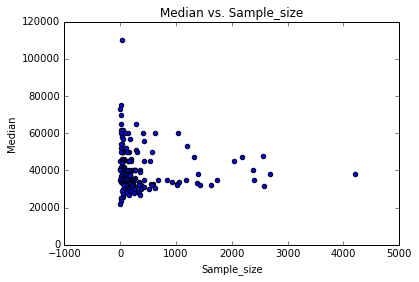

In [12]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title('Median vs. Sample_size')

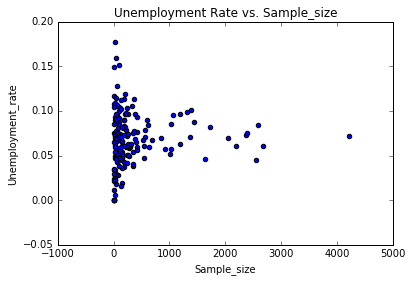

In [18]:
ax1 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax1.set_title('Unemployment Rate vs. Sample_size')

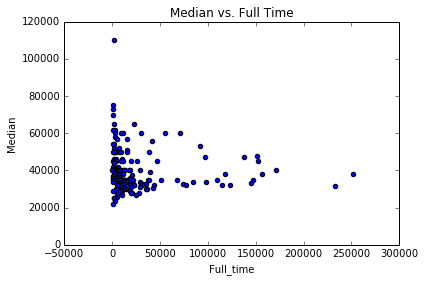

In [13]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Median vs. Full Time')

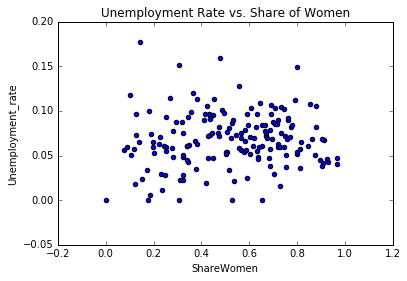

In [16]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title('Unemployment Rate vs. Share of Women')

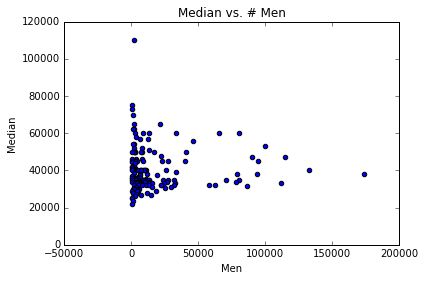

In [15]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('Median vs. # Men')

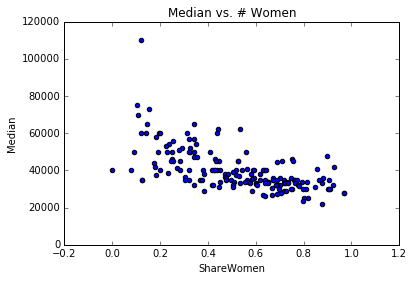

In [19]:
ax6 = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter')
ax6.set_title('Median vs. # Women')

From the plots above, we can try to draw some conclusions:

1. Based on sample size, we see that popular majors (high sample size) do not make more money, as their median salaries are along the same x axis as many of the less popular majors.

2. Since the median salary remains relatively constant between 30-50k as the amount of women in a major increases, it's likely that students who  majored in women-dominated subjects do not make more money. Otherwise the median would trend higher as the amount of women increased. In fact, if we plot ShareWomen vs Median, the plot actually trends downwards as share of women increases, meaning the more women in the major, the less money they will likely make.

3. Based on the median vs full time scatterplot, there is no relation between number of full time employees and median salary. However it can be said that there are definitely higher median salaries for SOME majors that have a small amount of full time employees (likely specialized or low-demand careers. 


Now we'll analyze the data using histograms:

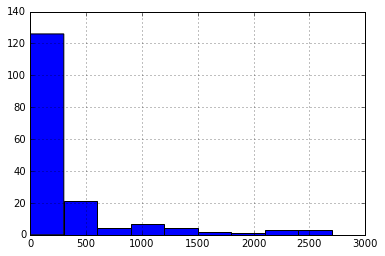

In [22]:
recent_grads['Sample_size'].hist(bins=10, range=(0,3000))

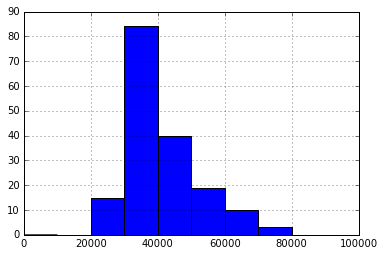

In [55]:
recent_grads['Median'].hist(bins=10, range=(0,100000))

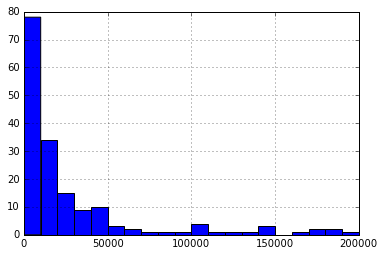

In [39]:
recent_grads['Employed'].hist(bins=20, range=(0,200000))

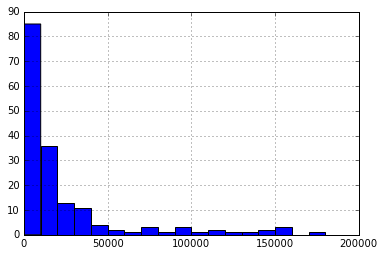

In [41]:
recent_grads['Full_time'].hist(bins=20, range=(0,200000))

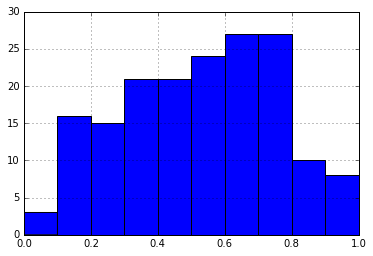

In [44]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))

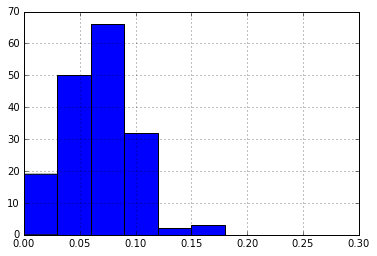

In [48]:
recent_grads['Unemployment_rate'].hist(bins=10, range=(0,.3))

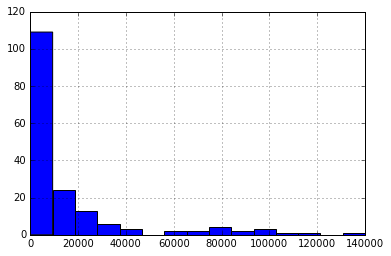

In [51]:
recent_grads['Men'].hist(bins=15, range=(0,140000))

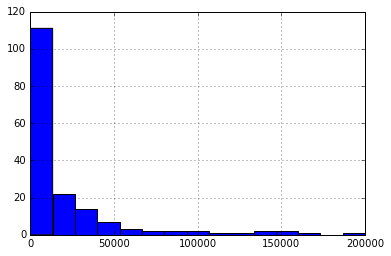

In [53]:
recent_grads['Women'].hist(bins=15, range=(0,200000))

Findings:

1. Based on our ShareWomen histogram, we see the majority of the series has a ShareWomen over .5, meaning the majority of majors are predominately female (probably about 60%)

2. Conversely this means about 40% of majors are predominately male. 

3. Based on our Median histogram, we can conclude that the most common median salary range is between 30k-40k.

Now we'll analyze the data using scatter matrix plots:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa091369748>,
      dtype=object)

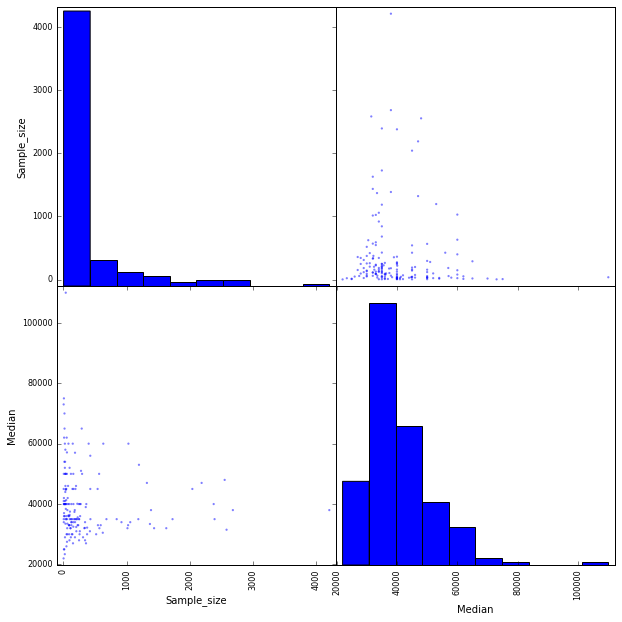

In [57]:
from pandas.plotting import scatter_matrix 

scatter_matrix(recent_grads[['Sample_size','Median']], figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa091200208>,
      dtype=object)

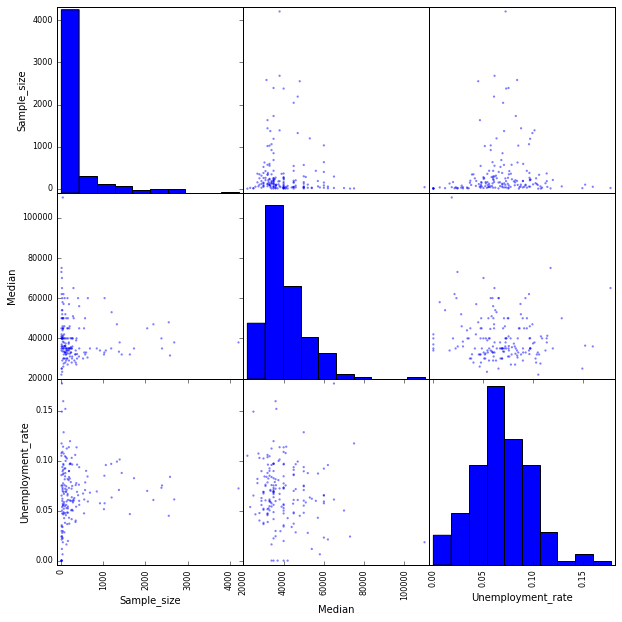

In [60]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize = (10,10))

Our findings remain consistent with the previous conclusions. 

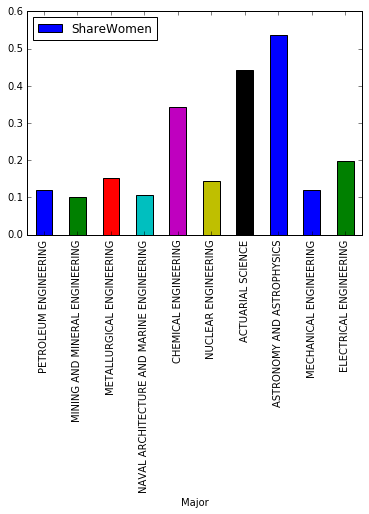

In [68]:
recent_grads[:10].plot.bar(x = 'Major', y = 'ShareWomen')

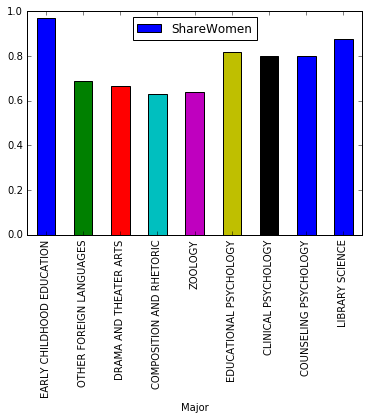

In [70]:
recent_grads[-9:].plot.bar(x = 'Major', y = 'ShareWomen')

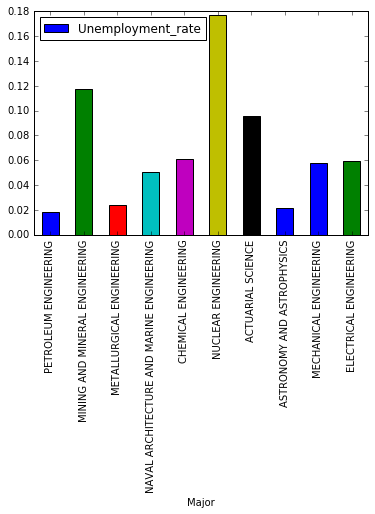

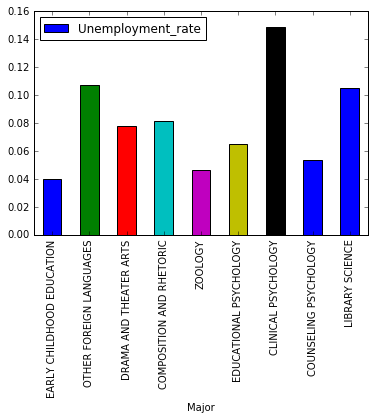

In [71]:
recent_grads[:10].plot.bar(x = 'Major', y = 'Unemployment_rate')
recent_grads[-9:].plot.bar(x = 'Major', y = 'Unemployment_rate')